# Persistent Model

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas import Series
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from pandas import read_csv
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import pmdarima as pm

             Close
Date              
2005-02-25  55.677
2005-02-28  54.021
2005-03-01  53.065
2005-03-02  52.418
2005-03-03  52.812


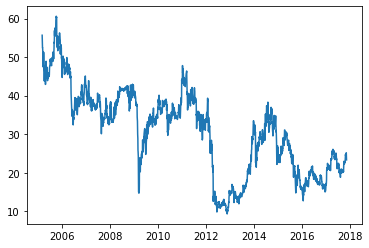

In [2]:
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')
 
stock = 'ypf' 
path = 'data/Stocks/'
df = read_csv(path +'%s.us.txt'%stock, header=0, parse_dates=[0], index_col=0, date_parser=parser)
df.drop(columns=['OpenInt','Open','High','Low','Volume'], inplace = True)
print(df.head())
plt.plot(df['Close'])

In [3]:
train_test_split = 0.80

### t+1

In [4]:
X1 = df.values
train_size = int(len(X1) * train_test_split)
train1, test1 = X1[:train_size].flatten(), X1[train_size:].flatten()

In [5]:
def model_persistence(x):
	return x

In [6]:
# walk-forward validation
predictions1 = list()

yhat = model_persistence(train1[len(train1)-1])
predictions1.append(yhat)

for x in test1:
	yhat = model_persistence(x)
	predictions1.append(yhat)
predictions1.pop()
rmse = np.sqrt(mean_squared_error(test1, predictions1))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.469


(285.0, 295.0, 18.0, 21.0)

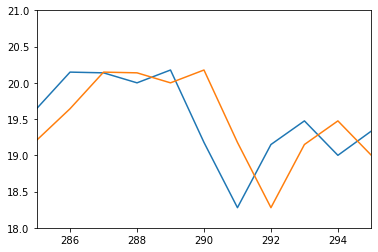

In [23]:
plt.plot(test1)
plt.plot(predictions1)
plt.axis([285, 295, 18, 21])

In [7]:
temp_test1 = test1.copy()
result_df1 = pd.DataFrame(temp_test1 , columns =['Initial'])
result_df1['Actual'] = test1
result_df1['Initial'] = result_df1['Initial'].shift(1, axis = 0)
result_df1['Predicted'] = predictions1
result_df1['Initial'][0] = train1[len(train1)-1]
result_df1['Act_Change'] = result_df1.apply(lambda row: row['Actual'] - row['Initial'] , axis = 1)
result_df1['Pred_Change'] = result_df1.apply(lambda row: row['Predicted'] - row['Initial'] , axis = 1)

result_df1.head(5)

,Initial,Actual,Predicted,Act_Change,Pred_Change
0,30.066,30.471,30.066,0.405,0.0
1,30.471,30.431,30.471,-0.040,0.0
2,30.431,30.538,30.431,0.107,0.0
3,30.538,30.411,30.538,-0.127,0.0
4,30.411,29.810,30.411,-0.601,0.0


In [8]:
profit = 0;
counter = 0
for index, row in result_df1.iterrows():
    if (row['Act_Change'] > 0):
        profit += row['Act_Change']
        counter += 1
if (counter == 0):
    print(counter)
else:
    print(profit/counter)

0.3706146179401997


### t+5

In [9]:
X5 = df.values
train_size = int(len(X5) * train_test_split)
train5, test5 = X5[:train_size].flatten(), X5[train_size:].flatten()

In [10]:
def model_persistence(x):
	return x

In [11]:
# walk-forward validation
predictions5 = list()

yhat = model_persistence(train5[len(train5)-1])
predictions5.append(yhat)

for x in test5:
	yhat = model_persistence(x)
	predictions5.append(yhat)
del predictions5[-5:]
rmse = np.sqrt(mean_squared_error(test5[4:], predictions5))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.186


In [12]:
temp_test5 = test5.copy()
result_df5 = pd.DataFrame(temp_test5 , columns =['Initial'])
result_df5['Initial'] = result_df5['Initial'].shift(1, axis =0)
result_df5['Initial'][0] = train5[len(train5)-1]
result_df5.drop(result_df5.tail(4).index,inplace=True)
result_df5['Actual'] = test5[4:]
result_df5['Predicted'] = predictions5
result_df5['Act_Change'] = result_df5.apply(lambda row: row['Actual'] - row['Initial'] , axis = 1)
result_df5['Pred_Change'] = result_df5.apply(lambda row: row['Predicted'] - row['Initial'] , axis = 1)

result_df5.head(7)

,Initial,Actual,Predicted,Act_Change,Pred_Change
0,30.066,29.810,30.066,-0.256,0.0
1,30.471,29.682,30.471,-0.789,0.0
2,30.431,29.554,30.431,-0.877,0.0
3,30.538,30.371,30.538,-0.167,0.0
4,30.411,29.997,30.411,-0.414,0.0
5,29.810,29.800,29.810,-0.010,0.0
6,29.682,29.594,29.682,-0.088,0.0


In [13]:
profit = 0;
counter = 0
for index, row in result_df5.iterrows():
    if (row['Act_Change'] > 0):
        profit += row['Act_Change']
        counter += 1
if (counter == 0):
    print(counter)
else:
    print(profit/counter)

0.8982677966101702


### t+30

In [14]:
X30 = df.values
train_size = int(len(X30) * train_test_split)
train30, test30 = X30[:train_size].flatten(), X30[train_size:].flatten()

In [15]:
def model_persistence(x):
	return x

In [16]:
# walk-forward validation
predictions30 = list()

yhat = model_persistence(train30[len(train30)-1])
predictions30.append(yhat)

for x in test30:
	yhat = model_persistence(x)
	predictions30.append(yhat)
del predictions30[-30:]
rmse = np.sqrt(mean_squared_error(test5[29:], predictions30))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.966


In [17]:
temp_test30 = test30.copy()
result_df30 = pd.DataFrame(temp_test30 , columns =['Initial'])
result_df30['Initial'] = result_df30['Initial'].shift(1, axis =0)
result_df30['Initial'][0] = train30[len(train30)-1]
result_df30.drop(result_df30.tail(29).index,inplace=True)
result_df30['Actual'] = test30[29:]
result_df30['Predicted'] = predictions30
result_df30['Act_Change'] = result_df30.apply(lambda row: row['Actual'] - row['Initial'] , axis = 1)
result_df30['Pred_Change'] = result_df30.apply(lambda row: row['Predicted'] - row['Initial'] , axis = 1)

result_df30.head(7)

,Initial,Actual,Predicted,Act_Change,Pred_Change
0,30.066,28.068,30.066,-1.998,0.0
1,30.471,27.565,30.471,-2.906,0.0
2,30.431,26.896,30.431,-3.535,0.0
3,30.538,25.773,30.538,-4.765,0.0
4,30.411,26.335,30.411,-4.076,0.0
5,29.810,26.197,29.810,-3.613,0.0
6,29.682,27.250,29.682,-2.432,0.0


In [18]:
profit = 0;
counter = 0
for index, row in result_df30.iterrows():
    if (row['Act_Change'] > 0):
        profit += row['Act_Change']
        counter += 1
if (counter == 0):
    print(counter)
else:
    print(profit/counter)

2.4740037453183525
